In [25]:
from collections import defaultdict as ddict
import random

import dill
import networkx as nx
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

In [3]:
with open("data/mscorpus/data_amr.dill", "rb") as f:
    data = dill.load(f)

In [22]:
instance["amr_data"].keys

['n1_mask', 'edge_type', 'edge_index', 'n2_mask', 'x']

In [35]:
def corrupt_graph(graph_data):
    node_list = list(range(len(graph_data.x)))
    n_edges = graph_data.edge_index.shape[1]
    connected_nodes = []

    new_edges = []

    for n in range(n_edges):

        if node_list:
            unconnected_node = node_list.pop()
        else:
            unconnected_node = random.choice(connected_nodes)

        if connected_nodes:
            connected_node = random.choice(connected_nodes)        
        else:
            connected_node = node_list.pop()
            connected_nodes.append(connected_node)
        
        new_edge = (unconnected_node, connected_node) if random.random() > 0.5 else (connected_node, unconnected_node)
        new_edges.append(new_edge)
        connected_nodes.append(unconnected_node)

    new_edge_index = torch.tensor(new_edges).T
    new_graph_data = Data(x=graph_data.x, edge_index=new_edge_index, edge_type=graph_data.edge_type, n1_mask=graph_data.n1_mask, n2_mask=graph_data.n2_mask)
    assert new_graph_data.keys == graph_data.keys

    return new_graph_data

def remove_edge_types(graph_data, edge_type_all=1):
    new_edge_types = torch.ones_like(graph_data.edge_type) * edge_type_all
    new_graph_data = Data(x=graph_data.x, edge_index=graph_data.edge_index, edge_type=new_edge_types, n1_mask=graph_data.n1_mask, n2_mask=graph_data.n2_mask)
    assert new_graph_data.keys == graph_data.keys


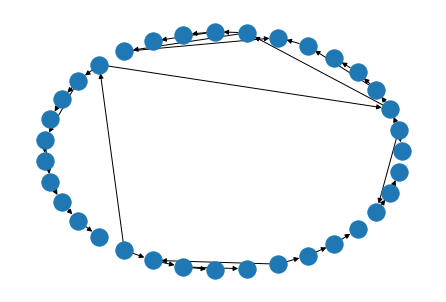

In [42]:
for idx, instance in enumerate(data["train"]["rels"]):
    amr_data = instance["amr_data"]
    n_nodes = len(amr_data.x)
    edge_index = amr_data.edge_index
    if edge_index.unique().tolist() != len(list(range(n_nodes))):
        pass
    new_graph_data = corrupt_graph(amr_data)

    graph_nx = to_networkx(amr_data)
    new_graph_nx = to_networkx(new_graph_data)
    break

nx.draw(graph_nx, pos=nx.drawing.layout.circular_layout(graph_nx))


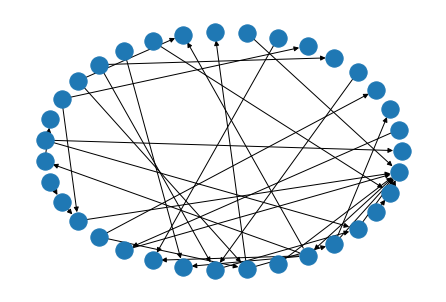

In [43]:
nx.draw(new_graph_nx, pos=nx.drawing.layout.circular_layout(new_graph_nx))